# Data Analysis

## 1--Here we import all of our dependencies for the simulation

In [1]:
import sys
from utils.Agent import Agent
from utils.Field import Field
from utils.Food import Food
from utils.Game import Game
from utils.Simulate import run_test
from utils.Simulate import *
from utils.Visualize import *
from typing import Dict
from random import randint, randrange
import numpy as np
from matplotlib import colors, pyplot as plt
from utils.tools import *
import os
import json
from random import shuffle
%matplotlib inline
# import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import seaborn as sns


## 2--Food Energy and Agent Energy Analysis Based on the Original Food Availability
The original food availability was 80%

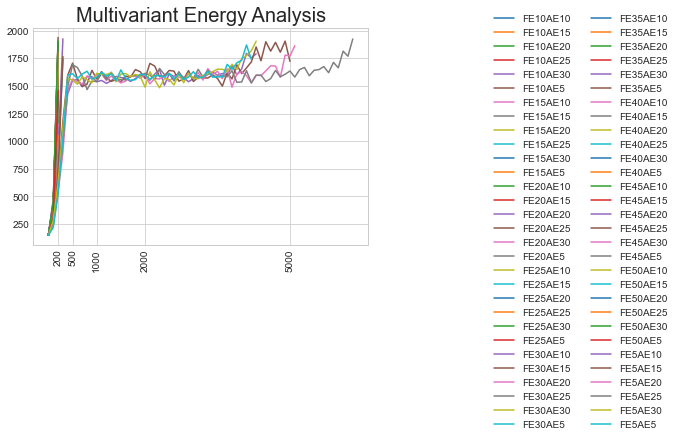

In [2]:
bin = []
legends = []
fig = plt.figure
ax = plt.axes()
files = []
for filename in os.listdir('data/energyAnalysis'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    with open((f"data/energyAnalysis/{filename}"), 'r') as f:
        data = json.load(f)
        pop = []
        cycle = []
        for key in data:
            if "cycle" in key:
                pop.append(data[key]['pop'])
                cycle.append(data[key]['cycle'])
        ax.plot(cycle[::100], pop[::100])
        legends.append(filename[7:-3])
ax.set_title("Multivariant Energy Analysis", fontdict = {'fontsize' : 20})
plt.legend(legends, bbox_to_anchor =(1.35, 1.1), ncol = 2)
plt.xticks([200, 500, 1000, 2000, 5000], rotation='vertical')
plt.savefig('figures/SparseEnergyanalysisfigure for everything', dpi=300, bbox_inches='tight')

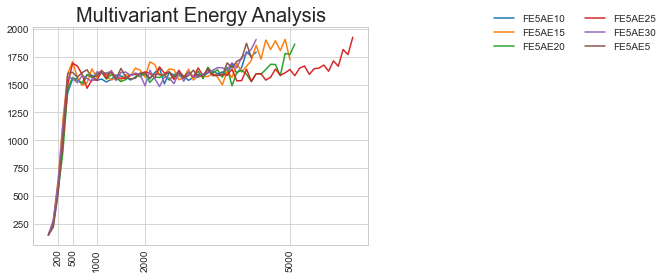

In [3]:
bin = []
legends = []
fig = plt.figure
ax = plt.axes()
files = []
for filename in os.listdir('data/energyAnalysis'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename and "FE5A" in filename:
        with open((f"data/energyAnalysis/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            for key in data:
                if "cycle" in key:
                    pop.append(data[key]['pop'])
                    cycle.append(data[key]['cycle'])
            ax.plot(cycle[::100], pop[::100])
            legends.append(filename[7:-3])
ax.set_title("Multivariant Energy Analysis", fontdict = {'fontsize' : 20})
plt.legend(legends, bbox_to_anchor =(1.35, 1.1), ncol = 2)
plt.xticks([200, 500, 1000, 2000, 5000], rotation='vertical')
plt.savefig('figures/SparseEnergyanalysisfigure for food energy 5', dpi=300, bbox_inches='tight')

Since the populations that did not boom abruptly were all food energy = 5, we conducted another analysis where the number of food were 500 or below.

## 3--The Energy Below 5 Analysis 
Populations of ISS were ran for 2000 cycles with food numbers of 200, 300, 400, and 500

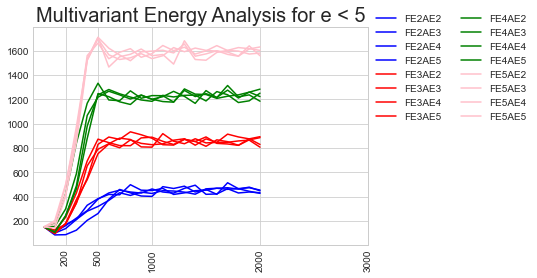

In [4]:
bin = []
legends = []
fig = plt.figure
ax = plt.axes()
files = []
for filename in os.listdir('data/energyAnalysisbelow5Desktop/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/energyAnalysisbelow5Desktop/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            for key in data:
                if "cycle" in key:
                    pop.append(data[key]['pop'])
                    cycle.append(data[key]['cycle'])
            if "FE2" in filename:
                ax.plot(cycle[::100], pop[::100], color = 'blue')
                legends.append(filename[7:-3])
            elif "FE3" in filename:
                ax.plot(cycle[::100], pop[::100], color = 'red')
                legends.append(filename[7:-3])
            elif "FE4" in filename:
                ax.plot(cycle[::100], pop[::100], color = 'green')
                legends.append(filename[7:-3])
            else:
                ax.plot(cycle[::100], pop[::100], color = 'pink')
                legends.append(filename[7:-3])
ax.set_title("Multivariant Energy Analysis for e < 5", fontdict = {'fontsize' : 20})
plt.legend(legends, bbox_to_anchor =(1.5, 1.1), ncol = 2)
plt.xticks([200, 500, 1000, 2000, 3000], rotation='vertical')
plt.savefig('figures/SparseEnergyanalysisfigure for energy below 5', dpi=300, bbox_inches='tight')

From here i decided that, since I want the population to be in between 400 and 600, I want to choose food energy = 2. Which means that the total energy in the field in a given year is 2 * 8000 = 16000. An analysis of total energy 16000 was run after this to see which combination yields a better trajectory of growth.

## 4--Total Energy Preserved Analysis
In all these runs, the total energy of 16000 per year is preserved.

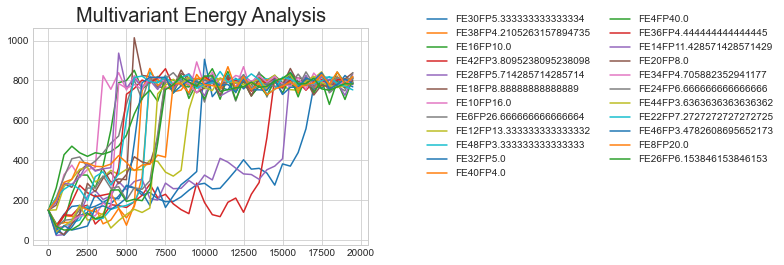

In [5]:
bin = []
legends = []
fig = plt.figure
ax = plt.axes()
for filename in os.listdir('data/energyOverPercentageAnalysis/'):
    if "output" in filename:
        with open((f"data/energyOverPercentageAnalysis/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            for key in data:
                if "cycle" in key:
                    pop.append(data[key]['pop'])
                    cycle.append(data[key]['cycle'])
            ax.plot(cycle[:20000][::500], pop[:20000][::500])
            legends.append(filename[7:-3])
ax.set_title("Multivariant Energy Analysis", fontdict = {'fontsize' : 20})
plt.legend(legends, bbox_to_anchor =(1.15, 1.1), ncol = 2)
# plt.xticks([200, 500, 1000, 2000, 20000], rotation='vertical')
plt.savefig('figures/SparseEnergyanalysisfigure Average Energy', dpi=300, bbox_inches='tight')

A weak correlation was found with the number of food and the cycle number where the population reached 800. A strong correlation was found between agent average energy and the number of food available. No correlation was found between the age demographic.

### Distributions of age, energy, and number of offsprings

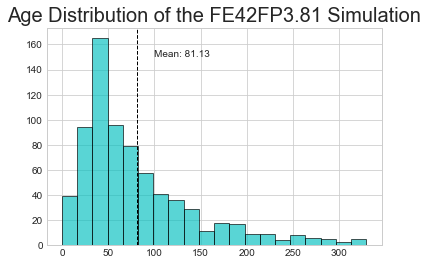

In [6]:
import numpy as np
import matplotlib.pyplot as plt
ages = []
with open('data/energyOverPercentageAnalysis/pickledGamePOST_FE42FP3.8095238095238098.pic', 'rb') as f:
    game = pickle.load(f)
    for agent_name in game.agents:
        ages.append(game.agents[agent_name].age)
ages = np.asarray(ages)        
plt.hist(ages, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(ages.mean(), color='k', linestyle='dashed', linewidth=1)   
plt.title("Age Distribution of the FE42FP3.81 Simulation", fontdict = {'fontsize' : 20})
plt.text(100, 150, 'Mean: {:.2f}'.format(ages.mean()))
plt.savefig("figures/ageDistributionFE42")

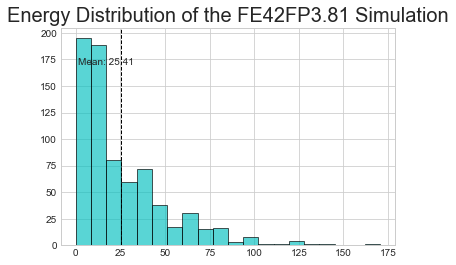

In [7]:
energy = []
with open('data/energyOverPercentageAnalysis/pickledGamePOST_FE42FP3.8095238095238098.pic', 'rb') as f:
    game = pickle.load(f)
    for agent_name in game.agents:
        energy.append(game.agents[agent_name].energy)
energy = np.asarray(energy)        
plt.hist(energy, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(energy.mean(), color='k', linestyle='dashed', linewidth=1)   
plt.title("Energy Distribution of the FE42FP3.81 Simulation", fontdict = {'fontsize' : 20})
plt.text(1.5, 170, 'Mean: {:.2f}'.format(energy.mean()))
plt.savefig("figures/energyDistributionFE42")

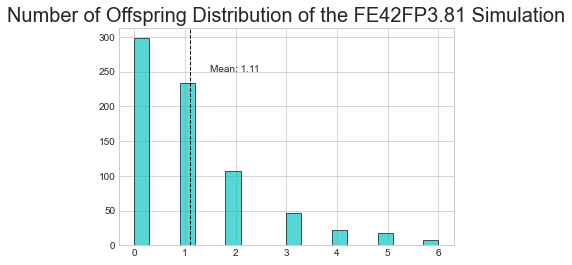

In [8]:
offspr = []
with open('data/energyOverPercentageAnalysis/pickledGamePOST_FE42FP3.8095238095238098.pic', 'rb') as f:
    game = pickle.load(f)
    for agent_name in game.agents:
        offspr.append(game.agents[agent_name].numkids)
offspr = np.asarray(offspr)        
plt.hist(offspr, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(offspr.mean(), color='k', linestyle='dashed', linewidth=1)   
plt.title("Number of Offspring Distribution of the FE42FP3.81 Simulation", fontdict = {'fontsize' : 20})
plt.text(1.5, 250, 'Mean: {:.2f}'.format(offspr.mean()))
plt.savefig("figures/numKidsDistributionFE42")  

As we see in the below histogram, the agent energy and the food energy correlate, as the food energy increases, the agent energy levels also increase

No handles with labels found to put in legend.


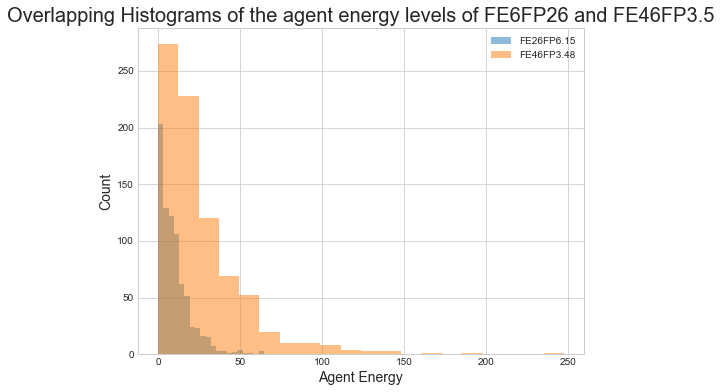

In [9]:
plt.figure(figsize=(8,6))
plt.xlabel("Agent Energy", size=14)
plt.legend(loc='upper right')
plt.ylabel("Count", size=14)
energy = []
with open(f'data/energyOverPercentageAnalysis/pickledGamePOST_FE6FP26.666666666666664.pic', 'rb') as f:
    game = pickle.load(f)
    for agent_name in game.agents:
        energy.append(game.agents[agent_name].energy)
plt.hist(energy, bins=20, alpha=0.5, label=f"FE26FP6.15")
plt.legend()
energy = []
plt.title("Overlapping Histograms of the agent energy levels of FE6FP26 and FE46FP3.5", fontdict = {'fontsize' : 20})

with open(f'data/energyOverPercentageAnalysis/pickledGamePOST_FE46FP3.4782608695652173.pic', 'rb') as f:
    game = pickle.load(f)
    for agent_name in game.agents:
        energy.append(game.agents[agent_name].energy)
plt.hist(energy, bins=20, alpha=0.5, label=f"FE46FP3.48") 
plt.legend()

## 5--ISS Populations:
Here we take all 25 runs of the ISS population and graph the individual populations over 20000 cycles along with the aggragate average of these populations

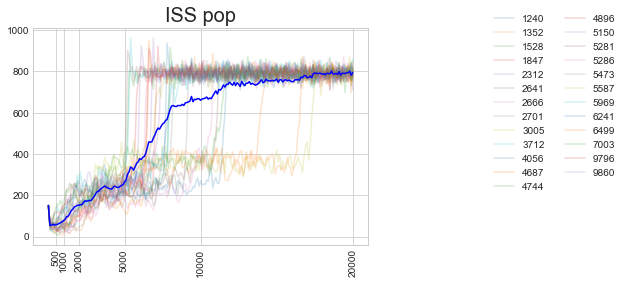

In [5]:
"""
Graphs the variable of your choice for the 25 runs and finds the average graph as well
"""

files = []
all_averages = []
for filename in os.listdir('data/25_ISS_games1/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/25_ISS_games1/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            if "20000" in data:
                for key in data:
                    if "header" in key:
                        continue
                    pop.append(data[key]['pop'])
    #                 cycle.append(data[key]['cycle'])
                all_averages.append(pop)
all_averages
all_averages_iss = np.average(all_averages, axis =0)
bin = []
legends = []
fig = plt.figure
ax = plt.axes()
files = []
cycles = [x for x in range(20001)]
for filename in os.listdir('data/25_ISS_games1/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/25_ISS_games1/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            if "20000" in data:
                for key in data:
                    if "header" in key:
                        continue
                    pop.append(data[key]["pop"])
                    cycle.append(data[key]['cycle'])
                ax.plot(cycle[::100], pop[::100], alpha=0.2)
                legends.append(filename[7:-3])
ax.plot(cycles[::100], all_averages_iss[::100], color="blue")
ax.set_title(f"ISS pop", fontdict = {'fontsize' : 20})
plt.legend(legends, bbox_to_anchor =(1.35, 1.1), ncol = 2)
plt.xticks([500, 1000, 2000, 5000, 10000, 20000], rotation='vertical')
plt.savefig('figures/25 ISS pop Averages', dpi=300, bbox_inches='tight')

In [101]:
av = []

for filename in os.listdir('data/25_SSS_games1/'):
    if "output" in filename:
        with open((f"data/25_SSS_games1/{filename}"), 'r') as f:
            data = json.load(f)
            av.append(data['20000']['pop'])
sum(av)/len(av)

688.92

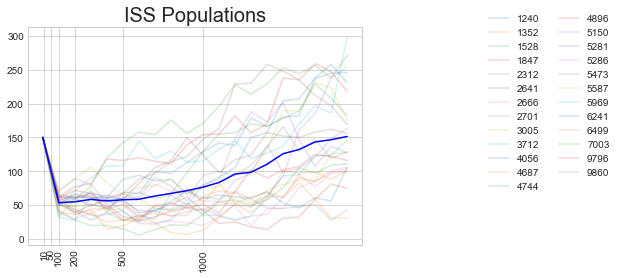

In [6]:
files = []
all_averages = []
for filename in os.listdir('data/25_ISS_games/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/25_ISS_games/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            if "20000" in data:
                for key in data:
                    if "header" in key:
                        continue
                    pop.append(data[key]['pop'])
    #                 cycle.append(data[key]['cycle'])
                all_averages.append(pop)
all_averages
all_averages_iss = np.average(all_averages, axis =0)
bin = []
legends = []
fig = plt.figure
ax = plt.axes()
files = []
cycles = [x for x in range(20001)]
for filename in os.listdir('data/25_ISS_games/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/25_ISS_games/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            if "20000" in data:
                for key in data:
                    if "header" in key:
                        continue
                    pop.append(data[key]['pop'])
                    cycle.append(data[key]['cycle'])
                ax.plot(cycle[:2000][::100], pop[:2000][::100], alpha=0.2)
                legends.append(filename[7:-3])
ax.plot(cycles[:2000][::100], all_averages_iss[:2000][::100], color="blue")
ax.set_title("ISS Populations", fontdict = {'fontsize' : 20})
plt.legend(legends, bbox_to_anchor =(1.35, 1.1), ncol = 2)
plt.xticks([10,50,100,200,500,1000], rotation='vertical')
plt.savefig('figures/test', dpi=300, bbox_inches='tight')

## 6--SSS Populations:
Here we take all 25 runs of the SSS population and graph the individual populations over 20000 cycles along with the aggragate average of these populations

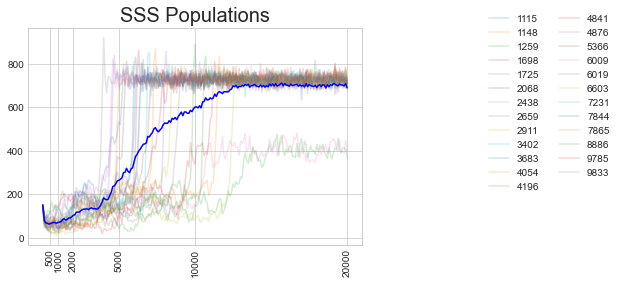

In [8]:
files = []
all_averages = []
for filename in os.listdir('data/25_SSS_games1/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/25_SSS_games1/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            if "20000" in data:
                for key in data:
                    if "header" in key:
                        continue
                    pop.append(data[key]['pop'])
    #                 cycle.append(data[key]['cycle'])
                all_averages.append(pop)
all_averages
all_averages_sss = np.average(all_averages, axis =0)
bin = []
legends = []
fig = plt.figure
ax = plt.axes()
files = []
cycles = [x for x in range(20001)]
for filename in os.listdir('data/25_SSS_games1/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/25_SSS_games1/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            if "20000" in data:
                for key in data:
                    if "header" in key:
                        continue
                    pop.append(data[key]['pop'])
                    cycle.append(data[key]['cycle'])
                ax.plot(cycle[::100], pop[::100], alpha=0.2)
                legends.append(filename[7:-3])
ax.plot(cycles[::100], all_averages_sss[::100], color="blue")
ax.set_title("SSS Populations", fontdict = {'fontsize' : 20})
plt.legend(legends, bbox_to_anchor =(1.35, 1.1), ncol = 2)
plt.xticks([500, 1000, 2000, 5000, 10000, 20000], rotation='vertical')
plt.savefig('figures/25 SSS population Averages', dpi=300, bbox_inches='tight')

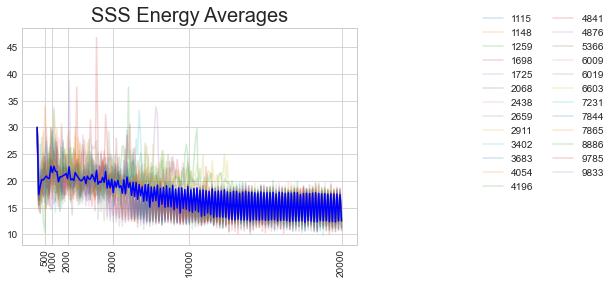

In [112]:
files = []
all_averages = []
for filename in os.listdir('data/25_SSS_games1/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/25_SSS_games1/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            if "20000" in data:
                for key in data:
                    if "header" in key:
                        continue
                    pop.append(data[key]['averageEnergy'])
    #                 cycle.append(data[key]['cycle'])
                all_averages.append(pop)
all_averages
all_averages_sss = np.average(all_averages, axis =0)
bin = []
legends = []
fig = plt.figure
ax = plt.axes()
files = []
cycles = [x for x in range(20001)]
for filename in os.listdir('data/25_SSS_games1/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/25_SSS_games1/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            if "20000" in data:
                for key in data:
                    if "header" in key:
                        continue
                    pop.append(data[key]['averageEnergy'])
                    cycle.append(data[key]['cycle'])
                ax.plot(cycle[::100], pop[::100], alpha=0.2)
                legends.append(filename[7:-3])
ax.plot(cycles[::100], all_averages_sss[::100], color="blue")
ax.set_title("SSS Energy Averages", fontdict = {'fontsize' : 20})
plt.legend(legends, bbox_to_anchor =(1.35, 1.1), ncol = 2)
plt.xticks([500, 1000, 2000, 5000, 10000, 20000], rotation='vertical')
plt.savefig('figures/25 SSS Energy Averages', dpi=300, bbox_inches='tight')


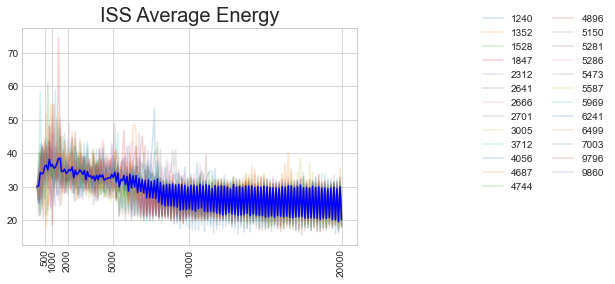

In [113]:
files = []
all_averages = []
for filename in os.listdir('data/25_ISS_games1/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/25_ISS_games1/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            if "20000" in data:
                for key in data:
                    if "header" in key:
                        continue
                    pop.append(data[key]['averageEnergy'])
    #                 cycle.append(data[key]['cycle'])
                all_averages.append(pop)
all_averages
all_averages_iss = np.average(all_averages, axis =0)
bin = []
legends = []
fig = plt.figure
ax = plt.axes()
files = []
cycles = [x for x in range(20001)]
for filename in os.listdir('data/25_ISS_games1/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/25_ISS_games1/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            if "20000" in data:
                for key in data:
                    if "header" in key:
                        continue
                    pop.append(data[key]['averageEnergy'])
                    cycle.append(data[key]['cycle'])
                ax.plot(cycle[::100], pop[::100], alpha=0.2)
                legends.append(filename[7:-3])
ax.plot(cycles[::100], all_averages_iss[::100], color="blue")
ax.set_title("ISS Average Energy", fontdict = {'fontsize' : 20})
plt.legend(legends, bbox_to_anchor =(1.35, 1.1), ncol = 2)
plt.xticks([500, 1000, 2000, 5000, 10000, 20000], rotation='vertical')
plt.savefig('figures/25 ISS Average Energy', dpi=300, bbox_inches='tight')


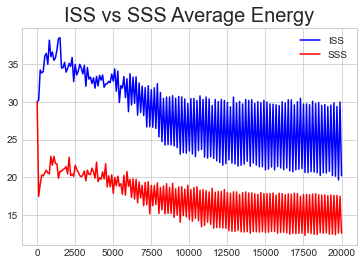

In [120]:
# Averages of both populations
fig = plt.figure
ax = plt.axes()
iss, = ax.plot(cycles[::100], all_averages_iss[::100], color="blue")
iss.set_label("ISS")
sss, = ax.plot(cycles[::100], all_averages_sss[::100], color="red")
sss.set_label("SSS")
plt.title("ISS vs SSS Average Energy", fontdict = {'fontsize' : 20})
plt.legend()

In [119]:
all_averages_sss[:-1]

array([30.        , 29.78629333, 29.71402667, ..., 13.1675729 ,
       12.94643343, 12.7218549 ])

NameError: name 'legends' is not defined

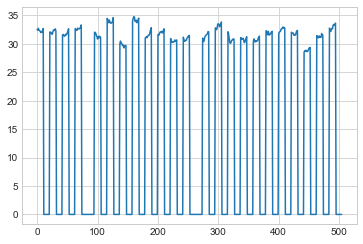

In [38]:
fig = plt.figure
ax = plt.axes()
ax.plot(all_iss_data, alpha=1)
legends.append(filename[7:-3])
ax.set_title("ISS At Test", fontsize='15')
plt.legend(legends, bbox_to_anchor =(1.35, 1.1), ncol = 2)
plt.xticks([5, 6,7,8,9,10], rotation='vertical')
plt.savefig('figures/ISS_after_test', dpi=300, bbox_inches='tight')

## 7--Population Growth, ISS vs SSS:
Here we are plotting both average populations against one another

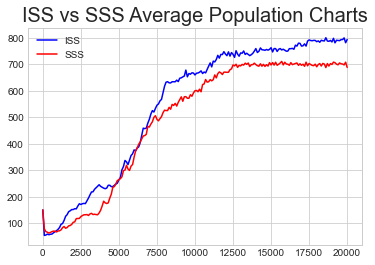

In [9]:
# Averages of both populations
fig = plt.figure
ax = plt.axes()
iss, = ax.plot(cycles[::100], all_averages_iss[::100], color="blue")
iss.set_label("ISS")
sss, = ax.plot(cycles[::100], all_averages_sss[::100], color="red")
sss.set_label("SSS")
plt.title("ISS vs SSS Average Population Charts", fontdict = {'fontsize' : 20})
plt.legend()


## 8--Food Capturing Ability Test
Here we are extracting 10 agents each from cycle 0 to 20000 from an ISS and a SSS simulation run. These agents are then put in environments with 25% food for 200 cycles. We record the number of food they capture and average it over the sample of 10. The cycle averages are then collected in an array each for the iss and sss runs.

In [ ]:
# Food capturing test to see their learning
extinction = True
while(extinction):
    game = Game(game_type="ISS", environment_type="Temperate")
    game.init_agents()
    game.populate()
    game.put_food()
    game_out, simulation_data, _, iss_agents_list = simulate(game, 20000, have_agents_list=True) 
    print(simulation_data["header"]["extinction"])
    if(simulation_data["header"]["extinction"] == False):
        extinction = False

extinction = True
while(extinction):
    game2 = Game(game_type="SSS", environment_type="Temperate")
    game2.init_agents()
    game2.populate()
    game2.put_food()
    game_out, simulation_data, _, sss_agents_list = simulate(game2, 20000, have_agents_list=True)
    print(simulation_data["header"]["extinction"])
    if(simulation_data["header"]["extinction"] == False):
        extinction = False
    

if(not(os.path.isdir(f"data/agent_lists_from_games"))):
        os.makedirs(f"data/agent_lists_from_games")


with open("data/agent_lists_from_games/ agent_lists.txt", "w+") as outfile:
    outfile.write("\nISS_agent_list:\n")
    outfile.write("\n".join(str(item) for item in iss_agents_list)) 
    outfile.write("\nSSS_agent_list:\n")
    outfile.write("\n".join(str(item) for item in sss_agents_list))

cycle number:  0
cycle number:  1
cycle number:  2
cycle number:  3
cycle number:  4
cycle number:  5
cycle number:  6
cycle number:  7
cycle number:  8
cycle number:  9
cycle number:  10
cycle number:  11
cycle number:  12
cycle number:  13
cycle number:  14
cycle number:  15
cycle number:  16
cycle number:  17
cycle number:  18
cycle number:  19
cycle number:  20
cycle number:  21
cycle number:  22
cycle number:  23
cycle number:  24
cycle number:  25
cycle number:  26
cycle number:  27
cycle number:  28
cycle number:  29
cycle number:  30
cycle number:  31
cycle number:  32
cycle number:  33
cycle number:  34
cycle number:  35
cycle number:  36
cycle number:  37
cycle number:  38
cycle number:  39
cycle number:  40
cycle number:  41
cycle number:  42
cycle number:  43
cycle number:  44
cycle number:  45
cycle number:  46
cycle number:  47
cycle number:  48
cycle number:  49
cycle number:  50
cycle number:  51
cycle number:  52
cycle number:  53
cycle number:  54
cycle number:  55
cy

cycle number:  439
cycle number:  440
cycle number:  441
cycle number:  442
cycle number:  443
cycle number:  444
cycle number:  445
cycle number:  446
cycle number:  447
cycle number:  448
cycle number:  449
cycle number:  450
cycle number:  451
cycle number:  452
cycle number:  453
cycle number:  454
cycle number:  455
cycle number:  456
cycle number:  457
cycle number:  458
cycle number:  459
cycle number:  460
cycle number:  461
cycle number:  462
cycle number:  463
cycle number:  464
cycle number:  465
cycle number:  466
cycle number:  467
cycle number:  468
cycle number:  469
cycle number:  470
cycle number:  471
cycle number:  472
cycle number:  473
cycle number:  474
cycle number:  475
cycle number:  476
cycle number:  477
cycle number:  478
cycle number:  479
cycle number:  480
cycle number:  481
cycle number:  482
cycle number:  483
cycle number:  484
cycle number:  485
cycle number:  486
cycle number:  487
cycle number:  488
cycle number:  489
cycle number:  490
cycle number

cycle number:  880
cycle number:  881
cycle number:  882
cycle number:  883
cycle number:  884
cycle number:  885
cycle number:  886
cycle number:  887
cycle number:  888
cycle number:  889
cycle number:  890
cycle number:  891
cycle number:  892
cycle number:  893
cycle number:  894
cycle number:  895
cycle number:  896
cycle number:  897
cycle number:  898
cycle number:  899
cycle number:  900
cycle number:  901
cycle number:  902
cycle number:  903
cycle number:  904
cycle number:  905
cycle number:  906
cycle number:  907
cycle number:  908
cycle number:  909
cycle number:  910
cycle number:  911
cycle number:  912
cycle number:  913
cycle number:  914
cycle number:  915
cycle number:  916
cycle number:  917
cycle number:  918
cycle number:  919
cycle number:  920
cycle number:  921
cycle number:  922
cycle number:  923
cycle number:  924
cycle number:  925
cycle number:  926
cycle number:  927
cycle number:  928
cycle number:  929
cycle number:  930
cycle number:  931
cycle number

cycle number:  1371
cycle number:  1372
cycle number:  1373
cycle number:  1374
cycle number:  1375
cycle number:  1376
cycle number:  1377
cycle number:  1378
cycle number:  1379
cycle number:  1380
cycle number:  1381
cycle number:  1382
cycle number:  1383
cycle number:  1384
cycle number:  1385
cycle number:  1386
cycle number:  1387
cycle number:  1388
cycle number:  1389
cycle number:  1390
cycle number:  1391
cycle number:  1392
cycle number:  1393
cycle number:  1394
cycle number:  1395
cycle number:  1396
cycle number:  1397
cycle number:  1398
cycle number:  1399
cycle number:  1400
cycle number:  1401
cycle number:  1402
cycle number:  1403
cycle number:  1404
cycle number:  1405
cycle number:  1406
cycle number:  1407
cycle number:  1408
cycle number:  1409
cycle number:  1410
cycle number:  1411
cycle number:  1412
cycle number:  1413
cycle number:  1414
cycle number:  1415
cycle number:  1416
cycle number:  1417
cycle number:  1418
cycle number:  1419
cycle number:  1420


cycle number:  1803
cycle number:  1804
cycle number:  1805
cycle number:  1806
cycle number:  1807
cycle number:  1808
cycle number:  1809
cycle number:  1810
cycle number:  1811
cycle number:  1812
cycle number:  1813
cycle number:  1814
cycle number:  1815
cycle number:  1816
cycle number:  1817
cycle number:  1818
cycle number:  1819
cycle number:  1820
cycle number:  1821
cycle number:  1822
cycle number:  1823
cycle number:  1824
cycle number:  1825
cycle number:  1826
cycle number:  1827
cycle number:  1828
cycle number:  1829
cycle number:  1830
cycle number:  1831
cycle number:  1832
cycle number:  1833
cycle number:  1834
cycle number:  1835
cycle number:  1836
cycle number:  1837
cycle number:  1838
cycle number:  1839
cycle number:  1840
cycle number:  1841
cycle number:  1842
cycle number:  1843
cycle number:  1844
cycle number:  1845
cycle number:  1846
cycle number:  1847
cycle number:  1848
cycle number:  1849
cycle number:  1850
cycle number:  1851
cycle number:  1852


cycle number:  2259
cycle number:  2260
cycle number:  2261
cycle number:  2262
cycle number:  2263
cycle number:  2264
cycle number:  2265
cycle number:  2266
cycle number:  2267
cycle number:  2268
cycle number:  2269
cycle number:  2270
cycle number:  2271
cycle number:  2272
cycle number:  2273
cycle number:  2274
cycle number:  2275
cycle number:  2276
cycle number:  2277
cycle number:  2278
cycle number:  2279
cycle number:  2280
cycle number:  2281
cycle number:  2282
cycle number:  2283
cycle number:  2284
cycle number:  2285
cycle number:  2286
cycle number:  2287
cycle number:  2288
cycle number:  2289
cycle number:  2290
cycle number:  2291
cycle number:  2292
cycle number:  2293
cycle number:  2294
cycle number:  2295
cycle number:  2296
cycle number:  2297
cycle number:  2298
cycle number:  2299
cycle number:  2300
cycle number:  2301
cycle number:  2302
cycle number:  2303
cycle number:  2304
cycle number:  2305
cycle number:  2306
cycle number:  2307
cycle number:  2308


cycle number:  2699
cycle number:  2700
cycle number:  2701
cycle number:  2702
cycle number:  2703
cycle number:  2704
cycle number:  2705
cycle number:  2706
cycle number:  2707
cycle number:  2708
cycle number:  2709
cycle number:  2710
cycle number:  2711
cycle number:  2712
cycle number:  2713
cycle number:  2714
cycle number:  2715
cycle number:  2716
cycle number:  2717
cycle number:  2718
cycle number:  2719
cycle number:  2720
cycle number:  2721
cycle number:  2722
cycle number:  2723
cycle number:  2724
cycle number:  2725
cycle number:  2726
cycle number:  2727
cycle number:  2728
cycle number:  2729
cycle number:  2730
cycle number:  2731
cycle number:  2732
cycle number:  2733
cycle number:  2734
cycle number:  2735
cycle number:  2736
cycle number:  2737
cycle number:  2738
cycle number:  2739
cycle number:  2740
cycle number:  2741
cycle number:  2742
cycle number:  2743
cycle number:  2744
cycle number:  2745
cycle number:  2746
cycle number:  2747
cycle number:  2748


cycle number:  3116
cycle number:  3117
cycle number:  3118
cycle number:  3119
cycle number:  3120
cycle number:  3121
cycle number:  3122
cycle number:  3123
cycle number:  3124
cycle number:  3125
cycle number:  3126
cycle number:  3127
cycle number:  3128
cycle number:  3129
cycle number:  3130
cycle number:  3131
cycle number:  3132
cycle number:  3133
cycle number:  3134
cycle number:  3135
cycle number:  3136
cycle number:  3137
cycle number:  3138
cycle number:  3139
cycle number:  3140
cycle number:  3141
cycle number:  3142
cycle number:  3143
cycle number:  3144
cycle number:  3145
cycle number:  3146
cycle number:  3147
cycle number:  3148
cycle number:  3149
cycle number:  3150
cycle number:  3151
cycle number:  3152
cycle number:  3153
cycle number:  3154
cycle number:  3155
cycle number:  3156
cycle number:  3157
cycle number:  3158
cycle number:  3159
cycle number:  3160
cycle number:  3161
cycle number:  3162
cycle number:  3163
cycle number:  3164
cycle number:  3165


cycle number:  3534
cycle number:  3535
cycle number:  3536
cycle number:  3537
cycle number:  3538
cycle number:  3539
cycle number:  3540
cycle number:  3541
cycle number:  3542
cycle number:  3543
cycle number:  3544
cycle number:  3545
cycle number:  3546
cycle number:  3547
cycle number:  3548
cycle number:  3549
cycle number:  3550
cycle number:  3551
cycle number:  3552
cycle number:  3553
cycle number:  3554
cycle number:  3555
cycle number:  3556
cycle number:  3557
cycle number:  3558
cycle number:  3559
cycle number:  3560
cycle number:  3561
cycle number:  3562
cycle number:  3563
cycle number:  3564
cycle number:  3565
cycle number:  3566
cycle number:  3567
cycle number:  3568
cycle number:  3569
cycle number:  3570
cycle number:  3571
cycle number:  3572
cycle number:  3573
cycle number:  3574
cycle number:  3575
cycle number:  3576
cycle number:  3577
cycle number:  3578
cycle number:  3579
cycle number:  3580
cycle number:  3581
cycle number:  3582
cycle number:  3583


cycle number:  3944
cycle number:  3945
cycle number:  3946
cycle number:  3947
cycle number:  3948
cycle number:  3949
cycle number:  3950
cycle number:  3951
cycle number:  3952
cycle number:  3953
cycle number:  3954
cycle number:  3955
cycle number:  3956
cycle number:  3957
cycle number:  3958
cycle number:  3959
cycle number:  3960
cycle number:  3961
cycle number:  3962
cycle number:  3963
cycle number:  3964
cycle number:  3965
cycle number:  3966
cycle number:  3967
cycle number:  3968
cycle number:  3969
cycle number:  3970
cycle number:  3971
cycle number:  3972
cycle number:  3973
cycle number:  3974
cycle number:  3975
cycle number:  3976
cycle number:  3977
cycle number:  3978
cycle number:  3979
cycle number:  3980
cycle number:  3981
cycle number:  3982
cycle number:  3983
cycle number:  3984
cycle number:  3985
cycle number:  3986
cycle number:  3987
cycle number:  3988
cycle number:  3989
cycle number:  3990
cycle number:  3991
cycle number:  3992
cycle number:  3993


cycle number:  4355
cycle number:  4356
cycle number:  4357
cycle number:  4358
cycle number:  4359
cycle number:  4360
cycle number:  4361
cycle number:  4362
cycle number:  4363
cycle number:  4364
cycle number:  4365
cycle number:  4366
cycle number:  4367
cycle number:  4368
cycle number:  4369
cycle number:  4370
cycle number:  4371
cycle number:  4372
cycle number:  4373
cycle number:  4374
cycle number:  4375
cycle number:  4376
cycle number:  4377
cycle number:  4378
cycle number:  4379
cycle number:  4380
cycle number:  4381
cycle number:  4382
cycle number:  4383
cycle number:  4384
cycle number:  4385
cycle number:  4386
cycle number:  4387
cycle number:  4388
cycle number:  4389
cycle number:  4390
cycle number:  4391
cycle number:  4392
cycle number:  4393
cycle number:  4394
cycle number:  4395
cycle number:  4396
cycle number:  4397
cycle number:  4398
cycle number:  4399
cycle number:  4400
cycle number:  4401
cycle number:  4402
cycle number:  4403
cycle number:  4404


cycle number:  4767
cycle number:  4768
cycle number:  4769
cycle number:  4770
cycle number:  4771
cycle number:  4772
cycle number:  4773
cycle number:  4774
cycle number:  4775
cycle number:  4776
cycle number:  4777
cycle number:  4778
cycle number:  4779
cycle number:  4780
cycle number:  4781
cycle number:  4782
cycle number:  4783
cycle number:  4784
cycle number:  4785
cycle number:  4786
cycle number:  4787
cycle number:  4788
cycle number:  4789
cycle number:  4790
cycle number:  4791
cycle number:  4792
cycle number:  4793
cycle number:  4794
cycle number:  4795
cycle number:  4796
cycle number:  4797
cycle number:  4798
cycle number:  4799
cycle number:  4800
cycle number:  4801
cycle number:  4802
cycle number:  4803
cycle number:  4804
cycle number:  4805
cycle number:  4806
cycle number:  4807
cycle number:  4808
cycle number:  4809
cycle number:  4810
cycle number:  4811
cycle number:  4812
cycle number:  4813
cycle number:  4814
cycle number:  4815
cycle number:  4816


cycle number:  5181
cycle number:  5182
cycle number:  5183
cycle number:  5184
cycle number:  5185
cycle number:  5186
cycle number:  5187
cycle number:  5188
cycle number:  5189
cycle number:  5190
cycle number:  5191
cycle number:  5192
cycle number:  5193
cycle number:  5194
cycle number:  5195
cycle number:  5196
cycle number:  5197
cycle number:  5198
cycle number:  5199
cycle number:  5200
cycle number:  5201
cycle number:  5202
cycle number:  5203
cycle number:  5204
cycle number:  5205
cycle number:  5206
cycle number:  5207
cycle number:  5208
cycle number:  5209
cycle number:  5210
cycle number:  5211
cycle number:  5212
cycle number:  5213
cycle number:  5214
cycle number:  5215
cycle number:  5216
cycle number:  5217
cycle number:  5218
cycle number:  5219
cycle number:  5220
cycle number:  5221
cycle number:  5222
cycle number:  5223
cycle number:  5224
cycle number:  5225
cycle number:  5226
cycle number:  5227
cycle number:  5228
cycle number:  5229
cycle number:  5230


cycle number:  5598
cycle number:  5599
cycle number:  5600
cycle number:  5601
cycle number:  5602
cycle number:  5603
cycle number:  5604
cycle number:  5605
cycle number:  5606
cycle number:  5607
cycle number:  5608
cycle number:  5609
cycle number:  5610
cycle number:  5611
cycle number:  5612
cycle number:  5613
cycle number:  5614
cycle number:  5615
cycle number:  5616
cycle number:  5617
cycle number:  5618
cycle number:  5619
cycle number:  5620
cycle number:  5621
cycle number:  5622
cycle number:  5623
cycle number:  5624
cycle number:  5625
cycle number:  5626
cycle number:  5627
cycle number:  5628
cycle number:  5629
cycle number:  5630
cycle number:  5631
cycle number:  5632
cycle number:  5633
cycle number:  5634
cycle number:  5635
cycle number:  5636
cycle number:  5637
cycle number:  5638
cycle number:  5639
cycle number:  5640
cycle number:  5641
cycle number:  5642
cycle number:  5643
cycle number:  5644
cycle number:  5645
cycle number:  5646
cycle number:  5647


cycle number:  6009
cycle number:  6010
cycle number:  6011
cycle number:  6012
cycle number:  6013
cycle number:  6014
cycle number:  6015
cycle number:  6016
cycle number:  6017
cycle number:  6018
cycle number:  6019
cycle number:  6020
cycle number:  6021
cycle number:  6022
cycle number:  6023
cycle number:  6024
cycle number:  6025
cycle number:  6026
cycle number:  6027
cycle number:  6028
cycle number:  6029
cycle number:  6030
cycle number:  6031
cycle number:  6032
cycle number:  6033
cycle number:  6034
cycle number:  6035
cycle number:  6036
cycle number:  6037
cycle number:  6038
cycle number:  6039
cycle number:  6040
cycle number:  6041
cycle number:  6042
cycle number:  6043
cycle number:  6044
cycle number:  6045
cycle number:  6046
cycle number:  6047
cycle number:  6048
cycle number:  6049
cycle number:  6050
cycle number:  6051
cycle number:  6052
cycle number:  6053
cycle number:  6054
cycle number:  6055
cycle number:  6056
cycle number:  6057
cycle number:  6058


cycle number:  6421
cycle number:  6422
cycle number:  6423
cycle number:  6424
cycle number:  6425
cycle number:  6426
cycle number:  6427
cycle number:  6428
cycle number:  6429
cycle number:  6430
cycle number:  6431
cycle number:  6432
cycle number:  6433
cycle number:  6434
cycle number:  6435
cycle number:  6436
cycle number:  6437
cycle number:  6438
cycle number:  6439
cycle number:  6440
cycle number:  6441
cycle number:  6442
cycle number:  6443
cycle number:  6444
cycle number:  6445
cycle number:  6446
cycle number:  6447
cycle number:  6448
cycle number:  6449
cycle number:  6450
cycle number:  6451
cycle number:  6452
cycle number:  6453
cycle number:  6454
cycle number:  6455
cycle number:  6456
cycle number:  6457
cycle number:  6458
cycle number:  6459
cycle number:  6460
cycle number:  6461
cycle number:  6462
cycle number:  6463
cycle number:  6464
cycle number:  6465
cycle number:  6466
cycle number:  6467
cycle number:  6468
cycle number:  6469
cycle number:  6470


cycle number:  6831
cycle number:  6832
cycle number:  6833
cycle number:  6834
cycle number:  6835
cycle number:  6836
cycle number:  6837
cycle number:  6838
cycle number:  6839
cycle number:  6840
cycle number:  6841
cycle number:  6842
cycle number:  6843
cycle number:  6844
cycle number:  6845
cycle number:  6846
cycle number:  6847
cycle number:  6848
cycle number:  6849
cycle number:  6850
cycle number:  6851
cycle number:  6852
cycle number:  6853
cycle number:  6854
cycle number:  6855
cycle number:  6856
cycle number:  6857
cycle number:  6858
cycle number:  6859
cycle number:  6860
cycle number:  6861
cycle number:  6862
cycle number:  6863
cycle number:  6864
cycle number:  6865
cycle number:  6866
cycle number:  6867
cycle number:  6868
cycle number:  6869
cycle number:  6870
cycle number:  6871
cycle number:  6872
cycle number:  6873
cycle number:  6874
cycle number:  6875
cycle number:  6876
cycle number:  6877
cycle number:  6878
cycle number:  6879
cycle number:  6880


cycle number:  7244
cycle number:  7245
cycle number:  7246
cycle number:  7247
cycle number:  7248
cycle number:  7249
cycle number:  7250
cycle number:  7251
cycle number:  7252
cycle number:  7253
cycle number:  7254
cycle number:  7255
cycle number:  7256
cycle number:  7257
cycle number:  7258
cycle number:  7259
cycle number:  7260
cycle number:  7261
cycle number:  7262
cycle number:  7263
cycle number:  7264
cycle number:  7265
cycle number:  7266
cycle number:  7267
cycle number:  7268
cycle number:  7269
cycle number:  7270
cycle number:  7271
cycle number:  7272
cycle number:  7273
cycle number:  7274
cycle number:  7275
cycle number:  7276
cycle number:  7277
cycle number:  7278
cycle number:  7279
cycle number:  7280
cycle number:  7281
cycle number:  7282
cycle number:  7283
cycle number:  7284
cycle number:  7285
cycle number:  7286
cycle number:  7287
cycle number:  7288
cycle number:  7289
cycle number:  7290
cycle number:  7291
cycle number:  7292
cycle number:  7293


cycle number:  7654
cycle number:  7655
cycle number:  7656
cycle number:  7657
cycle number:  7658
cycle number:  7659
cycle number:  7660
cycle number:  7661
cycle number:  7662
cycle number:  7663
cycle number:  7664
cycle number:  7665
cycle number:  7666
cycle number:  7667
cycle number:  7668
cycle number:  7669
cycle number:  7670
cycle number:  7671
cycle number:  7672
cycle number:  7673
cycle number:  7674
cycle number:  7675
cycle number:  7676
cycle number:  7677
cycle number:  7678
cycle number:  7679
cycle number:  7680
cycle number:  7681
cycle number:  7682
cycle number:  7683
cycle number:  7684
cycle number:  7685
cycle number:  7686
cycle number:  7687
cycle number:  7688
cycle number:  7689
cycle number:  7690
cycle number:  7691
cycle number:  7692
cycle number:  7693
cycle number:  7694
cycle number:  7695
cycle number:  7696
cycle number:  7697
cycle number:  7698
cycle number:  7699
cycle number:  7700
cycle number:  7701
cycle number:  7702
cycle number:  7703


cycle number:  8064
cycle number:  8065
cycle number:  8066
cycle number:  8067
cycle number:  8068
cycle number:  8069
cycle number:  8070
cycle number:  8071
cycle number:  8072
cycle number:  8073
cycle number:  8074
cycle number:  8075
cycle number:  8076
cycle number:  8077
cycle number:  8078
cycle number:  8079
cycle number:  8080
cycle number:  8081
cycle number:  8082
cycle number:  8083
cycle number:  8084
cycle number:  8085
cycle number:  8086
cycle number:  8087
cycle number:  8088
cycle number:  8089
cycle number:  8090
cycle number:  8091
cycle number:  8092
cycle number:  8093
cycle number:  8094
cycle number:  8095
cycle number:  8096
cycle number:  8097
cycle number:  8098
cycle number:  8099
cycle number:  8100
cycle number:  8101
cycle number:  8102
cycle number:  8103
cycle number:  8104
cycle number:  8105
cycle number:  8106
cycle number:  8107
cycle number:  8108
cycle number:  8109
cycle number:  8110
cycle number:  8111
cycle number:  8112
cycle number:  8113


cycle number:  8474
cycle number:  8475
cycle number:  8476
cycle number:  8477
cycle number:  8478
cycle number:  8479
cycle number:  8480
cycle number:  8481
cycle number:  8482
cycle number:  8483
cycle number:  8484
cycle number:  8485
cycle number:  8486
cycle number:  8487
cycle number:  8488
cycle number:  8489
cycle number:  8490
cycle number:  8491
cycle number:  8492
cycle number:  8493
cycle number:  8494
cycle number:  8495
cycle number:  8496
cycle number:  8497
cycle number:  8498
cycle number:  8499
cycle number:  8500
cycle number:  8501
cycle number:  8502
cycle number:  8503
cycle number:  8504
cycle number:  8505
cycle number:  8506
cycle number:  8507
cycle number:  8508
cycle number:  8509
cycle number:  8510
cycle number:  8511
cycle number:  8512
cycle number:  8513
cycle number:  8514
cycle number:  8515
cycle number:  8516
cycle number:  8517
cycle number:  8518
cycle number:  8519
cycle number:  8520
cycle number:  8521
cycle number:  8522
cycle number:  8523


cycle number:  8884
cycle number:  8885
cycle number:  8886
cycle number:  8887
cycle number:  8888
cycle number:  8889
cycle number:  8890
cycle number:  8891
cycle number:  8892
cycle number:  8893
cycle number:  8894
cycle number:  8895
cycle number:  8896
cycle number:  8897
cycle number:  8898
cycle number:  8899
cycle number:  8900
cycle number:  8901
cycle number:  8902
cycle number:  8903
cycle number:  8904
cycle number:  8905
cycle number:  8906
cycle number:  8907
cycle number:  8908
cycle number:  8909
cycle number:  8910
cycle number:  8911
cycle number:  8912
cycle number:  8913
cycle number:  8914
cycle number:  8915
cycle number:  8916
cycle number:  8917
cycle number:  8918
cycle number:  8919
cycle number:  8920
cycle number:  8921
cycle number:  8922
cycle number:  8923
cycle number:  8924
cycle number:  8925
cycle number:  8926
cycle number:  8927
cycle number:  8928
cycle number:  8929
cycle number:  8930
cycle number:  8931
cycle number:  8932
cycle number:  8933


cycle number:  9294
cycle number:  9295
cycle number:  9296
cycle number:  9297
cycle number:  9298
cycle number:  9299
cycle number:  9300
cycle number:  9301
cycle number:  9302
cycle number:  9303
cycle number:  9304
cycle number:  9305
cycle number:  9306
cycle number:  9307
cycle number:  9308
cycle number:  9309
cycle number:  9310
cycle number:  9311
cycle number:  9312
cycle number:  9313
cycle number:  9314
cycle number:  9315
cycle number:  9316
cycle number:  9317
cycle number:  9318
cycle number:  9319
cycle number:  9320
cycle number:  9321
cycle number:  9322
cycle number:  9323
cycle number:  9324
cycle number:  9325
cycle number:  9326
cycle number:  9327
cycle number:  9328
cycle number:  9329
cycle number:  9330
cycle number:  9331
cycle number:  9332
cycle number:  9333
cycle number:  9334
cycle number:  9335
cycle number:  9336
cycle number:  9337
cycle number:  9338
cycle number:  9339
cycle number:  9340
cycle number:  9341
cycle number:  9342
cycle number:  9343


cycle number:  9704
cycle number:  9705
cycle number:  9706
cycle number:  9707
cycle number:  9708
cycle number:  9709
cycle number:  9710
cycle number:  9711
cycle number:  9712
cycle number:  9713
cycle number:  9714
cycle number:  9715
cycle number:  9716
cycle number:  9717
cycle number:  9718
cycle number:  9719
cycle number:  9720
cycle number:  9721
cycle number:  9722
cycle number:  9723
cycle number:  9724
cycle number:  9725
cycle number:  9726
cycle number:  9727
cycle number:  9728
cycle number:  9729
cycle number:  9730
cycle number:  9731
cycle number:  9732
cycle number:  9733
cycle number:  9734
cycle number:  9735
cycle number:  9736
cycle number:  9737
cycle number:  9738
cycle number:  9739
cycle number:  9740
cycle number:  9741
cycle number:  9742
cycle number:  9743
cycle number:  9744
cycle number:  9745
cycle number:  9746
cycle number:  9747
cycle number:  9748
cycle number:  9749
cycle number:  9750
cycle number:  9751
cycle number:  9752
cycle number:  9753


cycle number:  10109
cycle number:  10110
cycle number:  10111
cycle number:  10112
cycle number:  10113
cycle number:  10114
cycle number:  10115
cycle number:  10116
cycle number:  10117
cycle number:  10118
cycle number:  10119
cycle number:  10120
cycle number:  10121
cycle number:  10122
cycle number:  10123
cycle number:  10124
cycle number:  10125
cycle number:  10126
cycle number:  10127
cycle number:  10128
cycle number:  10129
cycle number:  10130
cycle number:  10131
cycle number:  10132
cycle number:  10133
cycle number:  10134
cycle number:  10135
cycle number:  10136
cycle number:  10137
cycle number:  10138
cycle number:  10139
cycle number:  10140
cycle number:  10141
cycle number:  10142
cycle number:  10143
cycle number:  10144
cycle number:  10145
cycle number:  10146
cycle number:  10147
cycle number:  10148
cycle number:  10149
cycle number:  10150
cycle number:  10151
cycle number:  10152
cycle number:  10153
cycle number:  10154
cycle number:  10155
cycle number:

cycle number:  10500
cycle number:  10501
cycle number:  10502
cycle number:  10503
cycle number:  10504
cycle number:  10505
cycle number:  10506
cycle number:  10507
cycle number:  10508
cycle number:  10509
cycle number:  10510
cycle number:  10511
cycle number:  10512
cycle number:  10513
cycle number:  10514
cycle number:  10515
cycle number:  10516
cycle number:  10517
cycle number:  10518
cycle number:  10519
cycle number:  10520
cycle number:  10521
cycle number:  10522
cycle number:  10523
cycle number:  10524
cycle number:  10525
cycle number:  10526
cycle number:  10527
cycle number:  10528
cycle number:  10529
cycle number:  10530
cycle number:  10531
cycle number:  10532
cycle number:  10533
cycle number:  10534
cycle number:  10535
cycle number:  10536
cycle number:  10537
cycle number:  10538
cycle number:  10539
cycle number:  10540
cycle number:  10541
cycle number:  10542
cycle number:  10543
cycle number:  10544
cycle number:  10545
cycle number:  10546
cycle number:

cycle number:  10891
cycle number:  10892
cycle number:  10893
cycle number:  10894
cycle number:  10895
cycle number:  10896
cycle number:  10897
cycle number:  10898
cycle number:  10899
cycle number:  10900
cycle number:  10901
cycle number:  10902
cycle number:  10903
cycle number:  10904
cycle number:  10905
cycle number:  10906
cycle number:  10907
cycle number:  10908
cycle number:  10909
cycle number:  10910
cycle number:  10911
cycle number:  10912
cycle number:  10913
cycle number:  10914
cycle number:  10915
cycle number:  10916
cycle number:  10917
cycle number:  10918
cycle number:  10919
cycle number:  10920
cycle number:  10921
cycle number:  10922
cycle number:  10923
cycle number:  10924
cycle number:  10925
cycle number:  10926
cycle number:  10927
cycle number:  10928
cycle number:  10929
cycle number:  10930
cycle number:  10931
cycle number:  10932
cycle number:  10933
cycle number:  10934
cycle number:  10935
cycle number:  10936
cycle number:  10937
cycle number:

cycle number:  11284
cycle number:  11285
cycle number:  11286
cycle number:  11287
cycle number:  11288
cycle number:  11289
cycle number:  11290
cycle number:  11291
cycle number:  11292
cycle number:  11293
cycle number:  11294
cycle number:  11295
cycle number:  11296
cycle number:  11297
cycle number:  11298
cycle number:  11299
cycle number:  11300
cycle number:  11301
cycle number:  11302
cycle number:  11303
cycle number:  11304
cycle number:  11305
cycle number:  11306
cycle number:  11307
cycle number:  11308
cycle number:  11309
cycle number:  11310
cycle number:  11311
cycle number:  11312
cycle number:  11313
cycle number:  11314
cycle number:  11315
cycle number:  11316
cycle number:  11317
cycle number:  11318
cycle number:  11319
cycle number:  11320
cycle number:  11321
cycle number:  11322
cycle number:  11323
cycle number:  11324
cycle number:  11325
cycle number:  11326
cycle number:  11327
cycle number:  11328
cycle number:  11329
cycle number:  11330
cycle number:

cycle number:  11675
cycle number:  11676
cycle number:  11677
cycle number:  11678
cycle number:  11679
cycle number:  11680
cycle number:  11681
cycle number:  11682
cycle number:  11683
cycle number:  11684
cycle number:  11685
cycle number:  11686
cycle number:  11687
cycle number:  11688
cycle number:  11689
cycle number:  11690
cycle number:  11691
cycle number:  11692
cycle number:  11693
cycle number:  11694
cycle number:  11695
cycle number:  11696
cycle number:  11697
cycle number:  11698
cycle number:  11699
cycle number:  11700
cycle number:  11701
cycle number:  11702
cycle number:  11703
cycle number:  11704
cycle number:  11705
cycle number:  11706
cycle number:  11707
cycle number:  11708
cycle number:  11709
cycle number:  11710
cycle number:  11711
cycle number:  11712
cycle number:  11713
cycle number:  11714
cycle number:  11715
cycle number:  11716
cycle number:  11717
cycle number:  11718
cycle number:  11719
cycle number:  11720
cycle number:  11721
cycle number:

cycle number:  12066
cycle number:  12067
cycle number:  12068
cycle number:  12069
cycle number:  12070
cycle number:  12071
cycle number:  12072
cycle number:  12073
cycle number:  12074
cycle number:  12075
cycle number:  12076
cycle number:  12077
cycle number:  12078
cycle number:  12079
cycle number:  12080
cycle number:  12081
cycle number:  12082
cycle number:  12083
cycle number:  12084
cycle number:  12085
cycle number:  12086
cycle number:  12087
cycle number:  12088
cycle number:  12089
cycle number:  12090
cycle number:  12091
cycle number:  12092
cycle number:  12093
cycle number:  12094
cycle number:  12095
cycle number:  12096
cycle number:  12097
cycle number:  12098
cycle number:  12099
cycle number:  12100
cycle number:  12101
cycle number:  12102
cycle number:  12103
cycle number:  12104
cycle number:  12105
cycle number:  12106
cycle number:  12107
cycle number:  12108
cycle number:  12109
cycle number:  12110
cycle number:  12111
cycle number:  12112
cycle number:

In [3]:
# with open("data/oneISSoneSSSAgentsList/agent_list_1645.txt") as f:
#     for line in f:
#         print(line)

agent_name, agent = ('agent87', <utils.Agent.Agent object at 0x7efc8eedf828>)
        

SyntaxError: invalid syntax (3070250124.py, line 5)

In [4]:
iss_record, sss_record = run_test(iss_agents_list, sss_agents_list, duration=200, environment="Test")

if(not(os.path.isdir(f"data/food_capturing_test"))):
        os.makedirs(f"data/food_capturing_test")


with open("data/food_capturing_test/food_cap_test_results.txt", "w+") as outfile:
    outfile.write("\nISS_record:\n")
    outfile.write("\n".join(str(item) for item in iss_record)) 
    outfile.write("\nSSS_record:\n")
    outfile.write("\n".join(str(item) for item in sss_record))
    
length = len(iss_record)
cycles = [x for x in range(20001)]

NameError: name 'iss_agents_list' is not defined

AttributeError: 'function' object has no attribute 'show'

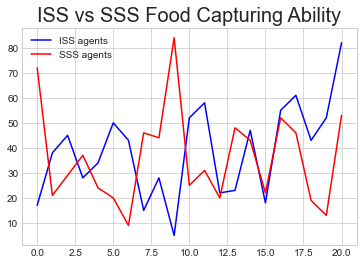

In [8]:
fig = plt.figure
ax = plt.axes()
iss, = ax.plot(cycles[:length], iss_record[:length], color="blue")
iss.set_label("ISS agents")
sss, = ax.plot(cycles[:length], sss_record[:length], color="red")
sss.set_label("SSS agents")
plt.title("ISS vs SSS Food Capturing Ability", fontdict = {'fontsize' : 20})
plt.legend()
fig.show()

### Graph for the Food Capturing Ability
Here we graph the average food captured of agents native to their generation over 200 cycles in 25% food solo environments.

ValueError: x and y must have same first dimension, but have shapes (201,) and (2,)

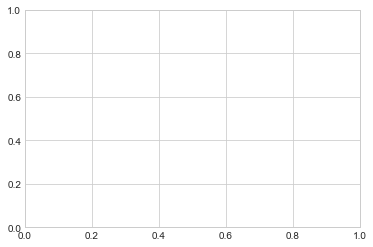

In [5]:
cycles = [x for x in range(20001)]

fig = plt.figure
ax = plt.axes()
iss, = ax.plot(cycles[::100], iss_record[::100], color="blue")
iss.set_label("ISS agents")
sss, = ax.plot(cycles[::100], sss_record[::100], color="red")
sss.set_label("SSS agents")
plt.title("ISS vs SSS Food Capturing Ability", fontdict = {'fontsize' : 20})
plt.legend()

## 9--Harsh Environment Test
Fully developed populations of both and iss and sss game taken and placed in a "Harsh" environment with only half the food availability (2.5%). The Ensuing populations are then graphed.

In [3]:
# get all iss games here
iss_games = []
for filename in os.listdir(f'data/25_ISS_games/'):
    if("POST" in filename):
        with open(f"data/25_ISS_games/{filename}", 'rb') as f:
#             print(filename)
            post_iss_game = pickle.load(f)
            iss_games.append(post_iss_game)
# get all sss games here
sss_games = []
for filename in os.listdir(f'data/25_SSS_games/'):
    if("POST" in filename):
        with open(f"data/25_SSS_games/{filename}", 'rb') as f:
            post_sss_game = pickle.load(f)
            sss_games.append(post_sss_game)
            
# get all data from the iss games by running all of them on harsh environment           
all_iss_data = []            
for game in iss_games:
    pop_list = []
    game.environment_type = "Harsh"
    game.put_food(challenge=True)
    _, iss_data,_,_ = simulate(game=game, cycles=10)
    print(len(iss_data))
    for key in iss_data:
        if key =="header":
            continue
        pop_list.append(iss_data[key]["pop"])
#     pop_list += [0 for x in range(10)]
    all_iss_data.append(pop_list[:11])
    
# get all data from the sss games by running all of them on harsh environment              
all_sss_data = []            
for game in sss_games:
    pop_list = []
    game.environment_type = "Harsh"
    game.put_food(challenge=True)
    _, sss_data,_,_ = simulate(game=game, cycles=10)
    print(len(sss_data))
    for key in sss_data:
        if key =="header":
            continue
        pop_list.append(sss_data[key]["pop"])
#     pop_list += [0 for x in range(10)]
    all_sss_data.append(pop_list[:11])

EOFError: Ran out of input

In [32]:
averaged_iss = np.average(all_iss_data, axis = 0)
averaged_sss = np.average(all_sss_data, axis = 0)

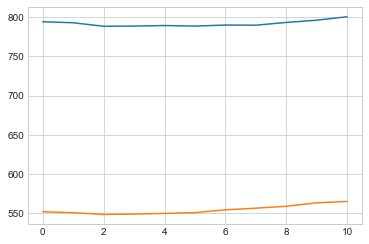

In [40]:
fig = plt.figure
ax = plt.axes()
ax.plot(averaged_iss, alpha=1)
ax.plot(averaged_sss, alpha=1)

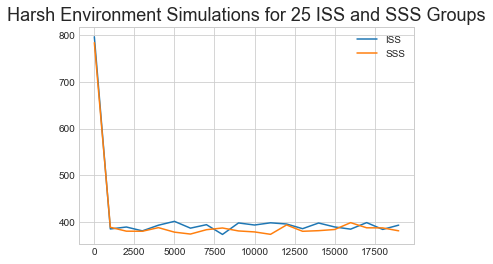

In [161]:

fig = plt.figure
ax = plt.axes()
pops=[]
for filename in os.listdir("data/25_H_ISS/"):
    if "output" in filename:
        with open(f"data/25_H_ISS/{filename}") as f:
            data = json.load(f)
        pop = []
        for key in data:
            if "header" in key:
                continue
            pop.append(data[key]['pop'])
        pops.append(pop)
       
    
pops_iss = np.average(pops, axis =0)

pops=[]
for filename in os.listdir("data/25_H_SSS/"):
    if "output" in filename:
        with open(f"data/25_H_SSS/{filename}") as f:
            data = json.load(f)
        pop = []
        for key in data:
            if "header" in key:
                continue
            pop.append(data[key]['pop'])
        pops.append(pop)
       
    
pops_sss = np.average(pops, axis =0)

cycles = [x for x in range(20001)]
ax.plot(cycles[:20000][::1000], pops_iss[:20000][::1000], label="ISS")
ax.plot(cycles[:20000][::1000], pops_sss[:20000][::1000], label="SSS")
plt.title("Harsh Environment Simulations for 25 ISS and SSS Groups", size=18)
ax.legend()

## 10-- ISS and SSS Competing
Here we have one ISS and one SSS society put into the same environment after they have been trained,
we track their individual populations to see which one thrives

25


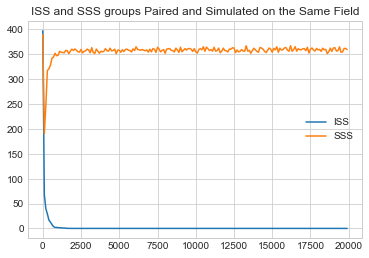

In [38]:
pops_iss = []
pops_sss = []
for filename in os.listdir("data/compTest1/"):
    with open(f"data/compTest1/{filename}") as f:
        data = json.load(f)
    pop_ISS = []
    pop_SSS = []
    for key in data:
        if "header" in key:
            continue
        pop_ISS.append(data[key]['popISS'])
        pop_SSS.append(data[key]['popSSS'])
    pops_iss.append(pop_ISS)
    pops_sss.append(pop_SSS)
print(len(pops_iss)    )
pops_iss = np.average(pops_iss, axis =0)
pops_sss = np.average(pops_sss, axis =0)
fig = plt.figure
ax = plt.axes()
cycles = [x for x in range(20001)]
ax.plot(cycles[:20000][::100], pops_iss[:20000][::100], label="ISS")
ax.plot(cycles[:20000][::100], pops_sss[:20000][::100], label="SSS")
plt.title("ISS and SSS groups Paired and Simulated on the Same Field")
plt.style.use('seaborn-whitegrid')
ax.legend()


In [39]:
with open(f"data/SIT_p0.5/output_1792.js") as f:
    social_genes = []
    data = json.load(f)
    for agent in data['1000']['agents']:
        social_genes.append(data['1000']['agents'][agent][0]["socialGene"])
            

In [45]:
for gene in social_genes:
    if(gene > 0): print(gene)

6.173367020509041
5.4554874227075345
7.149114565214549
6.756516731099181
5.515588539754726
5.316315895437792
6.846858062415951
4.993433223588046
7.148534699331315
5.988548404876177
2.1514868813879398
5.674119449808072
5.827661117443941
7.297349925690965
6.564700845013328
6.833358891392232
6.061763210896992
6.939998098162435
6.734056348002279
5.396072109116952
6.455871971378901
6.66103320577518
6.396893720632676
7.617961601517968
6.515310517934164
6.604982198116597
5.220560901389775
6.054593095738447
6.031247905153073
4.899153367107543
5.859038426584435
6.83271616580513
7.844122241375581
7.16687678120956
7.115057888218834
6.739434207125657
5.029323137760665
5.847286573987743
6.555382551806583
6.39561865577167
6.367369080695773
6.77984814506475
7.0293715363129445
5.853815483974508
6.7164546123478726
7.67823826581641
6.242314141431658
6.520504844252835
7.090800945565055
8.051583131364579
6.734018932276518
6.090119137886739
5.45635508725506
6.24511270349174
6.650605893401667
6.375408416535

/var/folders/2p/s70xcr4s47l_qw0w55jpj_hh0000gn/T/ipykernel_81653/120511894.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_genes = np.asarray(all_genes)
/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

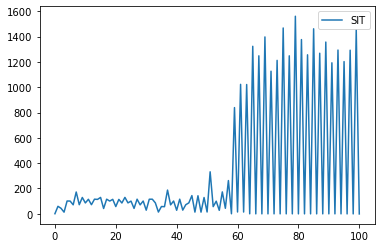

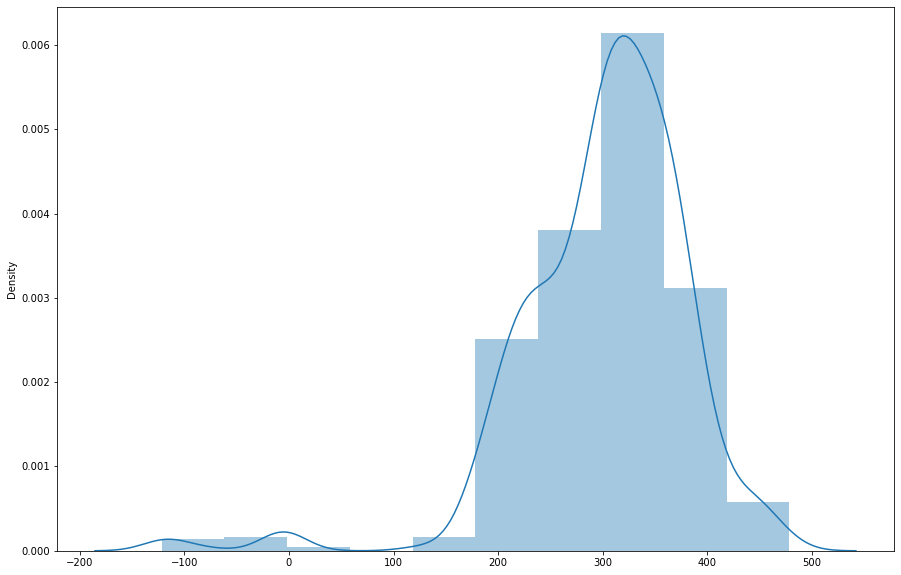

In [34]:
pops=[]
with open(f"data/SIT_P0.5_2000s/output_3419.js") as f:
    data = json.load(f)
    for key in data:
        if "header" in key:
            continue
        pops.append(data[key]['centralStorage'])
fig = plt.figure
ax = plt.axes()
ax.plot(pops[::100], label="SIT")
ax.legend()        


agents_data = []
with open(f"data/SIT_P0.5_2000s/output_3419.js") as f:
    data = json.load(f)
    pop=[]
    for key in data:
        if "header" in key:
            continue
        if 'agents' in data[key]:
            agents_data.append(data[key]['agents'])
            
all_genes = []
for batch in agents_data:
    socialGene = []
    for agent in batch:
        socialGene.append(batch[agent][0]['socialGene'])
    all_genes.append(socialGene)
all_genes = np.asarray(all_genes)
plt.figure(figsize=(15, 10))
# sns.distplot(all_genes[0], bins=10, norm_hist=True, label="Generation1")
sns.distplot(all_genes[1], bins=10, norm_hist=True, label="Generation1000")

In [26]:
agents = []
for key in data:
    if "10000" in key:
        agents=data[key]['agents']
    
    

In [27]:
for agent in agents:
    print(data['10000']['agents'][agent][0]['socialGene'])

6707.105507112263
7898.777801742087
7905.914867189945
10795.783959812172
9768.498472739851
7811.455418281265
9704.807898003295
9178.590593562065
10029.196842214733
6744.652620789802
8255.548077619189
10891.285341084773
9014.585442245434
9145.453126784047
9061.025996008542
9907.329796016578
11148.844734027054
9425.480331320001
7146.876327006325
10745.048959477612
8408.716320081609
7629.7505400774835
7911.082756436
8408.492260421039
9543.457276855495
8545.838329072953
8782.342561775571
10824.400663723412
9367.46565532227
9702.806041687487
9314.51391569372
10748.505614475696
8112.0026958091275
6744.637368228084
10958.89010935163
9756.181591391414
9175.588390020233
9930.453587805358
8616.677864915035
7592.94811682895
14543.543789987636
11154.228285258101
7408.240387095245
9018.761864048109
10472.354713623996
8334.931889537569
9064.056593928117
10086.116455962632
10780.963749354794
9167.963635780232
13252.27812773262
9767.396631048827
8621.638305205124
10748.49445277487
6744.637790033136
10

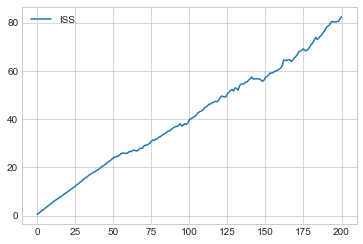

In [361]:
with open(f"data/SIT_p0.5/output_7580.js") as f:
    data = json.load(f)
    pops=[]
    for key in data:
        if "header" in key:
            continue
        pops.append(data[key]['averageSocialGene'])

fig = plt.figure
ax = plt.axes()
ax.plot(pops, label="ISS")
ax.legend()

In [338]:
most_energy = []
for filename in os.listdir("data/VOLUN_W_SSS_G45K55/"):
    if "output" in filename:
        with open(f"data/VOLUN_W_SSS_G45K55/{filename}") as f:
            data = json.load(f)
            for key in data:
                if "header" in key:
                    continue
                most_energy = data[key]['pop'])

In [51]:
avgs=[]
avg = []
for filename in os.listdir("data/VOLUN_W_SSS_G45K55/"):
    if "output" in filename:
        with open(f"data/VOLUN_W_SSS_G45K55/{filename}") as f:
            data = json.load(f)
            pop=[]
            for key in data:
                if "header" in key:
                    continue
                avg.append(data['20000']['averageSocialGene'])
            avgs.append(avg)


In [54]:
avgs = np.average(avgs, axis=0)

In [57]:
np.mean(avgs)

0.17204455037791344

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


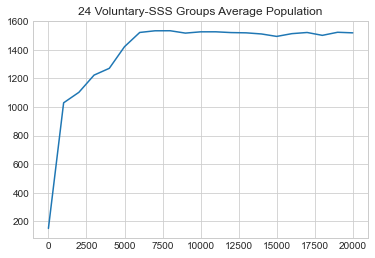

In [71]:
avg = []
for filename in os.listdir("data/VOLUN_W_SSS_G45K55/"):
    if "output" in filename:
        with open(f"data/VOLUN_W_SSS_G45K55/{filename}") as f:
            data = json.load(f)
            pop=[]
            for key in data:
                if "header" in key:
                    continue
                pop.append(data[key]['pop'])
            avg.append(pop)
plt.style.use('seaborn-whitegrid')
avg = np.average(avg, axis = 0)
cycles = [x for x in range(len(avg))]
fig = plt.figure
ax = plt.axes()
plt.title("24 Voluntary-SSS Groups Average Population")
ax.plot(cycles[::1000], avg[::1000])
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


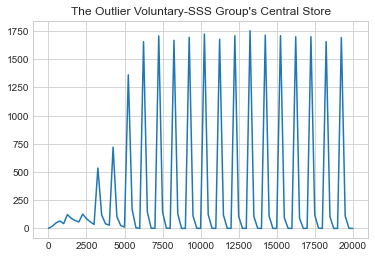

In [84]:
all_cents = []
for filename in os.listdir("data/VOLUN_W_SSS_G45K55/"):
    if "output" in filename:
        with open(f"data/VOLUN_W_SSS_G45K55/{filename}") as f:
            data = json.load(f)
            pop=[]
            for key in data:
                if "header" in key:
                    continue
                pop.append(data[key]['centralStorage'])
            all_cents.append(pop)
all_cents = np.average(all_cents, axis=0)
cycles = [x for x in range(len(pop))]
fig = plt.figure
ax = plt.axes()
plt.title("The Outlier Voluntary-SSS Group's Central Store")
ax.plot(cycles[::250], all_cents[::250])
ax.legend()

/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

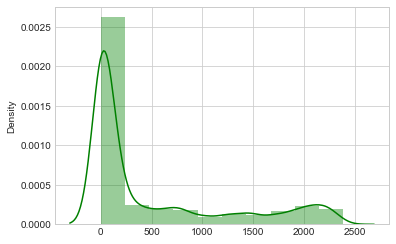

In [79]:
sns.distplot(all_cents, bins=10, norm_hist=True, color="green", label="Generation2000")


In [35]:
agents_data = []
with open(f"data/VOLUN_W_SSS_G45K55/output_2816.js") as f:
    data = json.load(f)
    pop=[]
    for key in data:
        if "header" in key:
            continue
        if 'agents' in data[key]:
            agents_data.append(data[key]['agents'])
       

/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

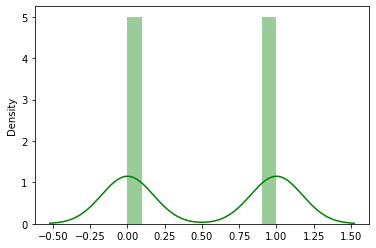

In [66]:
a = [1 for x in range(100)]
b = [0 for x in range(100)]
c = a+b
sns.distplot(c, bins=10, norm_hist=True, color="green", label="Generation2000")


/var/folders/2p/s70xcr4s47l_qw0w55jpj_hh0000gn/T/ipykernel_72710/667906624.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_genes = np.asarray(all_genes)
/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please a

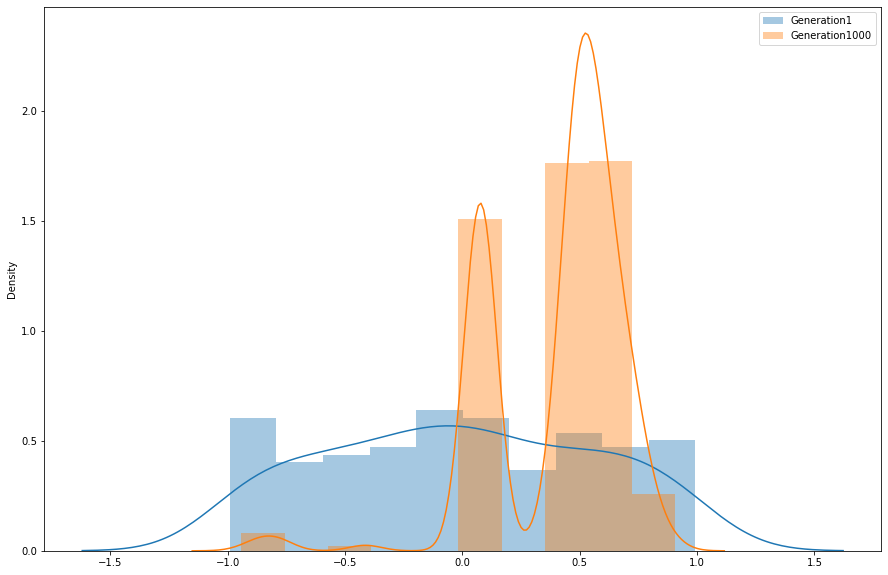

In [69]:
all_genes = []
for batch in agents_data:
    socialGene = []
    for agent in batch:
        socialGene.append(batch[agent][0]['socialGene'])
    all_genes.append(socialGene)
all_genes = np.asarray(all_genes)
plt.figure(figsize=(15, 10))
sns.distplot(all_genes[0], bins=10, norm_hist=True, label="Generation1")
sns.distplot(all_genes[1], bins=10, norm_hist=True, label="Generation1000")
# sns.distplot(all_genes[2], bins=10, norm_hist=False, color="green", label="Generation2000")
# sns.distplot(all_genes[3], bins=10, norm_hist=False, color="red", label="Generation3000")


# plt.text(0.1,0.1,'Mean: {:.2f}'.format(five_genes.mean()))

plt.legend()

In [34]:
len(all_games_genes)

96

/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future v

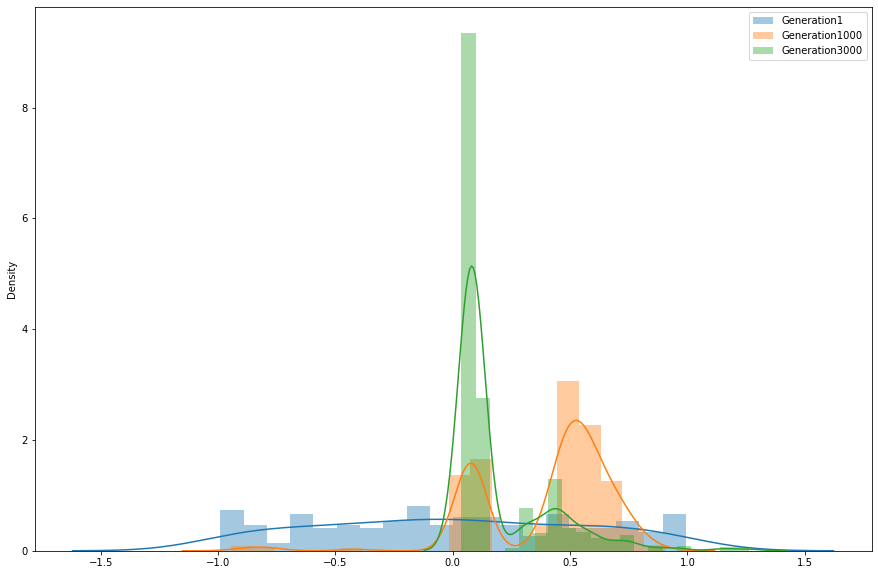

In [8]:
all_genes = []
for batch in agents_data:
    socialGene = []
    for agent in batch:
        socialGene.append(batch[agent][0]['socialGene'])
    all_genes.append(socialGene)
plt.figure(figsize=(15, 10))
sns.distplot(all_genes[0], bins=20, norm_hist=True, label="Generation1")
sns.distplot(all_genes[1], bins=20, norm_hist=True, label="Generation1000")
sns.distplot(all_genes[3], bins=20, norm_hist=True, label="Generation3000")
plt.legend()

/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future v

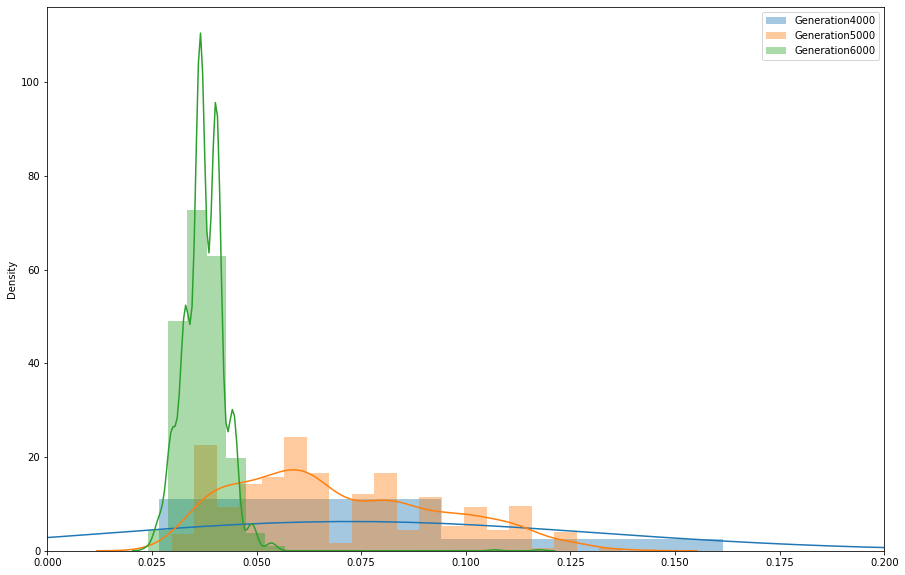

In [9]:
plt.figure(figsize=(15, 10))
sns.distplot(all_genes[4], bins=20, norm_hist=True, label="Generation4000")
sns.distplot(all_genes[5], bins=20, norm_hist=True, label="Generation5000")
sns.distplot(all_genes[6], bins=20, norm_hist=True, label="Generation6000")
plt.xlim(0,0.2)
plt.legend()

In [17]:
bad=[]
good=[]
all_genes = np.asarray(all_genes)
for generation in all_genes:
    generation = np.asarray(generation)
    bads = ((generation < 0).sum())/len(generation)
    goods = ((generation > 0).sum())/len(generation)
    bad.append(bads)
    good.append(goods)

In [19]:
bad

[0.5066666666666667,
 0.019130434782608695,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

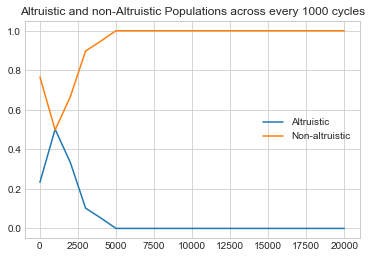

In [328]:
fig = plt.figure
ax = plt.axes()
plt.title("Altruistic and non-Altruistic Populations across every 1000 cycles")
ax.plot(cycles[::1000], good, label="Altruistic")
ax.plot(cycles[::1000], bad, label="Non-altruistic")
ax.legend()

In [268]:
good

[36, 579, 831, 790, 662, 766, 1344]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

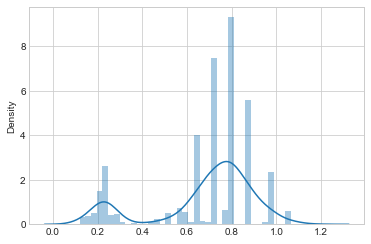

In [234]:
sns.distplot(all_genes[6], label="Compact")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

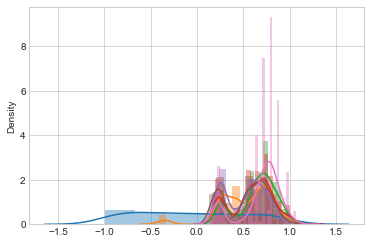

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


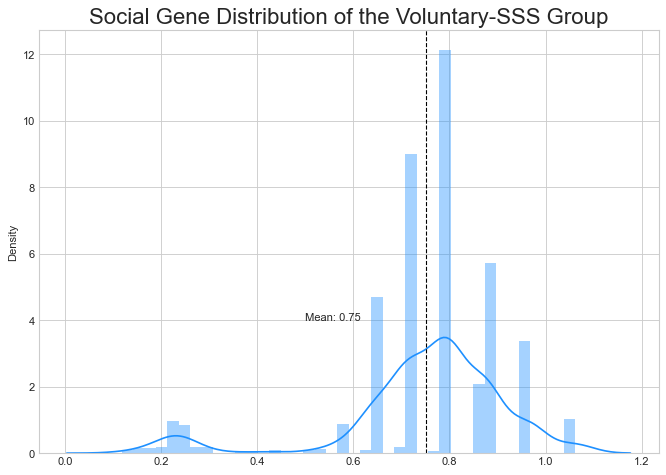

In [182]:
sG = []
with open(f"data/VOLUN_W_SSS_G45K55/pickledGamePOST_5977.pic", "rb") as f:
    data = pickle.load(f)
    for agent_name in data.agents:
        sG.append(data.agents[agent_name].social_gene)
sG = np.asarray(sG)


plt.figure(figsize=(10,7), dpi= 80)

# plt.hist(sG, bins=20, color='c', edgecolor='k', alpha=0.65)
sns.distplot(sG, color="dodgerblue", label="Compact")
plt.axvline(sG.mean(), color='k', linestyle='dashed', linewidth=1)   
plt.title("Social Gene Distribution of the Voluntary-SSS Group", fontdict = {'fontsize' : 20})
plt.text(0.5, 4, 'Mean: {:.2f}'.format(sG.mean()))
plt.savefig("figures/SgDistributionFE42")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


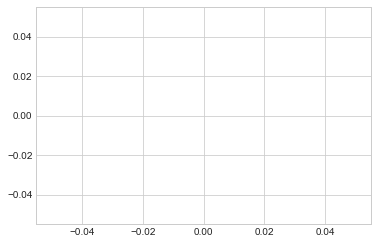

In [200]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np

peaks, _ = find_peaks(sG, height =4)
sns.distplot(peaks, color="dodgerblue", label="Compact")
# plt.plot(peaks, sG[peaks], "x")
# plt.plot(np.zeros_like(sG), "--", color="gray")
plt.show()

In [205]:
num_iss = (sG < 0.5).sum()
num_sss = (sG > 0.5).sum()

In [206]:
num_iss

138

In [207]:
num_sss

1831

In [208]:
(138/(138+1831))*100

7.0086338242762825

In [188]:
el

58

In [34]:
import numpy as np
import matplotlib.pyplot as plt
ages = []
with open('data/25_ISS_games1/output_1240.js', 'rb') as f:
    data = json.load(f)
    var = []
for agent in data["20000"]['agents']:
    var.append(agent['socialGene'])
          
plt.hist(ages, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(ages.mean(), color='k', linestyle='dashed', linewidth=1)   
plt.title("Age Distribution of the FE42FP3.81 Simulation", fontdict = {'fontsize' : 20})
plt.text(100, 150, 'Mean: {:.2f}'.format(ages.mean()))
plt.savefig("figures/ageDistributionFE42")

TypeError: string indices must be integers

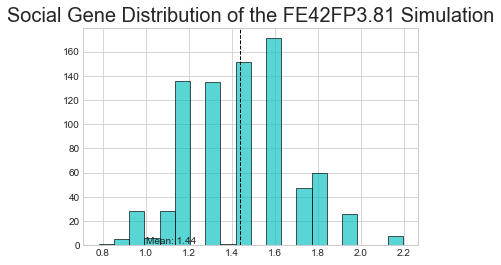

In [58]:
import numpy as np
import matplotlib.pyplot as plt
ages = []
with open('data/25_ISS_games1/output_1240.js', 'rb') as f:
    data = json.load(f)
    var = []
    for agent in data["20000"]['agents']:
        var.append(data["20000"]['agents'][agent][0]["socialGene"])
    #     print(data["20000"]['agents'][agent][0]["socialGene"])
var = np.asarray(var)
plt.hist(var, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(var.mean(), color='k', linestyle='dashed', linewidth=1)   
plt.title("Social Gene Distribution of the FE42FP3.81 Simulation", fontdict = {'fontsize' : 20})
plt.text(1, 1.5, 'Mean: {:.2f}'.format(var.mean()))
plt.savefig("figures/socialGeneDistributionFE42")

In [ ]:
# os.mkdir('data/learning_test')
with open("data/learning_test_jupyter/test_results_jupyter.txt", "w+") as outfile:
    outfile.write("\n".join(str(item) for item in iss_record)) 
    outfile.write("\n".join(str(item) for item in sss_record))

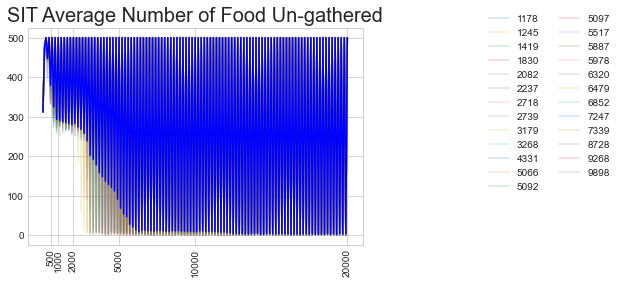

In [59]:
files = []
all_averages = []
for filename in os.listdir('data/SIT_P0.5_20000s/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/SIT_P0.5_20000s/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            if "20000" in data:
                for key in data:
                    if "header" in key:
                        continue
                    pop.append(data[key]['numFood'])
    #                 cycle.append(data[key]['cycle'])
                all_averages.append(pop)
all_averages
all_averages_sss = np.average(all_averages, axis =0)
bin = []
legends = []
fig = plt.figure
ax = plt.axes()
files = []
cycles = [x for x in range(20001)]
for filename in os.listdir('data/SIT_P0.5_20000s/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/SIT_P0.5_20000s/{filename}"), 'r') as f:
            data = json.load(f)
            pop = []
            cycle = []
            if "20000" in data:
                for key in data:
                    if "header" in key:
                        continue
                    pop.append(data[key]['numFood'])
                    cycle.append(data[key]['cycle'])
                ax.plot(cycle[::100], pop[::100], alpha=0.2)
                legends.append(filename[7:-3])
ax.plot(cycles[::100], all_averages_sss[::100], color="blue")
ax.set_title("SIT Average Number of Food Un-gathered", fontdict = {'fontsize' : 20})
plt.legend(legends, bbox_to_anchor =(1.35, 1.1), ncol = 2)
plt.xticks([500, 1000, 2000, 5000, 10000, 20000], rotation='vertical')
plt.savefig('figures/25 SIT Food Presence Averages', dpi=300, bbox_inches='tight')

In [50]:
fin_pops=[]
for filename in os.listdir('data/SIT_P0.5_20000s/'):
    if "output" in filename:
        files.append(filename)
files = sorted(files)    
for filename in files:
    if "output" in filename:
        with open((f"data/SIT_P0.5_20000s/{filename}"), 'r') as f:
            data = json.load(f)
            fin_pops.append(data['20000']['pop'])
        

/var/folders/2p/s70xcr4s47l_qw0w55jpj_hh0000gn/T/ipykernel_81653/3920799472.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_genes = np.asarray(all_genes)
/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/orcuntasdemir/Desktop/vassar/thesis/code/.thesisEnv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please

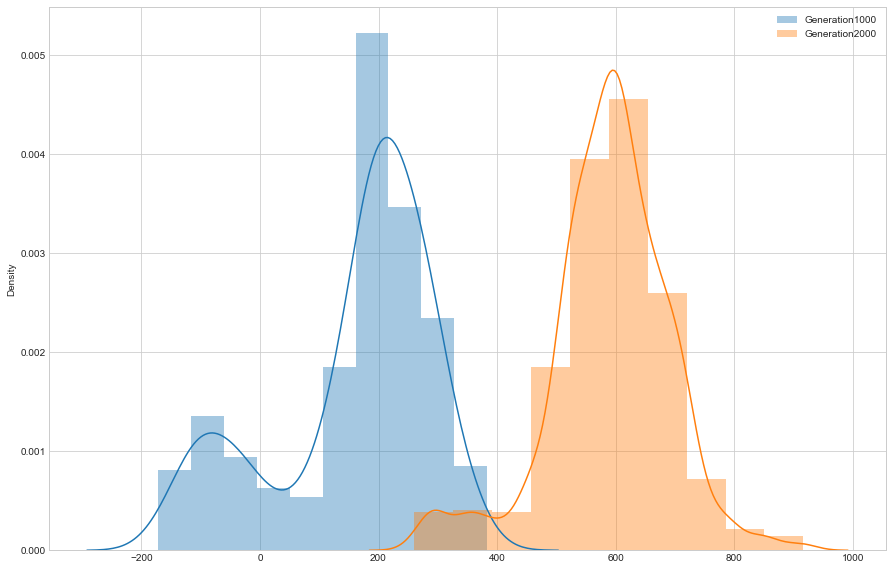

In [65]:
agents_data = []
with open(f"data/SIT_P0.5_20000s/output_1245.js") as f:
    data = json.load(f)
    pop=[]
    for key in data:
        if "header" in key:
            continue
        if 'agents' in data[key]:
            agents_data.append(data[key]['agents'])
all_genes = []
for batch in agents_data:
    socialGene = []
    for agent in batch:
        socialGene.append(batch[agent][0]['socialGene'])
    all_genes.append(socialGene)
all_genes = np.asarray(all_genes)
plt.figure(figsize=(15, 10))
sns.distplot(all_genes[1], bins=10, norm_hist=True, label="Generation1000")
sns.distplot(all_genes[2], bins=10, norm_hist=True, label="Generation2000")
plt.legend()